# DataFrame and Series

In [1]:
import pandas as pd

In [2]:
pd.read_excel("xl/course_participants.xlsx")

,user_id,name,age,country,score,continent
0,1001,Mark,55,Italy,4.5,Europe
1,1000,John,33,USA,6.7,America
2,1002,Tim,41,USA,3.9,America
3,1003,Jenny,12,Germany,9.0,Europe


In [3]:
data = [["Mark", 55, "Italy", 4.5, "Europe"],
        ["John", 33, "USA", 6.7, "America"],
        ["Tim", 41, "USA", 3.9, "America"],
        ["Jenny", 12, "Germany", 9.0, "Europe"]]
df = pd.DataFrame(data=data,
                  columns=["name", "age", "country",
                           "score", "continent"],
                  index=[1001, 1000, 1002, 1003])
df

,name,age,country,score,continent
1001,Mark,55,Italy,4.5,Europe
1000,John,33,USA,6.7,America
1002,Tim,41,USA,3.9,America
1003,Jenny,12,Germany,9.0,Europe


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 1001 to 1003
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       4 non-null      object 
 1   age        4 non-null      int64  
 2   country    4 non-null      object 
 3   score      4 non-null      float64
 4   continent  4 non-null      object 
dtypes: float64(1), int64(1), object(3)
memory usage: 192.0+ bytes


## Index

In [5]:
df.index

Int64Index([1001, 1000, 1002, 1003], dtype='int64')

In [6]:
df.index.name = "user_id"
df

,name,age,country,score,continent
user_id,,,,,
1001,Mark,55,Italy,4.5,Europe
1000,John,33,USA,6.7,America
1002,Tim,41,USA,3.9,America
1003,Jenny,12,Germany,9.0,Europe


In [7]:
# "reset_index" turns the index into a column, replacing the
# index with the default index. This corresponds to the DataFrame
# from the beginning that we loaded from Excel.
df.reset_index()

,user_id,name,age,country,score,continent
0,1001,Mark,55,Italy,4.5,Europe
1,1000,John,33,USA,6.7,America
2,1002,Tim,41,USA,3.9,America
3,1003,Jenny,12,Germany,9.0,Europe


In [8]:
# "reset_index" turns "user_id" into a regular column and
# "set_index" turns the column "name" into the index
df.reset_index().set_index("name")

,user_id,age,country,score,continent
name,,,,,
Mark,1001,55,Italy,4.5,Europe
John,1000,33,USA,6.7,America
Tim,1002,41,USA,3.9,America
Jenny,1003,12,Germany,9.0,Europe


In [9]:
df.reindex([999, 1000, 1001, 1004])

,name,age,country,score,continent
user_id,,,,,
999,NaN,NaN,NaN,NaN,NaN
1000,John,33.0,USA,6.7,America
1001,Mark,55.0,Italy,4.5,Europe
1004,NaN,NaN,NaN,NaN,NaN


In [10]:
df.sort_index()

,name,age,country,score,continent
user_id,,,,,
1000,John,33,USA,6.7,America
1001,Mark,55,Italy,4.5,Europe
1002,Tim,41,USA,3.9,America
1003,Jenny,12,Germany,9.0,Europe


In [11]:
df.sort_values(["continent", "age"])

,name,age,country,score,continent
user_id,,,,,
1000,John,33,USA,6.7,America
1002,Tim,41,USA,3.9,America
1003,Jenny,12,Germany,9.0,Europe
1001,Mark,55,Italy,4.5,Europe


## Columns

In [12]:
df.columns

Index(['name', 'age', 'country', 'score', 'continent'], dtype='object')

In [13]:
df.columns.name = "properties"
df

properties,name,age,country,score,continent
user_id,,,,,
1001,Mark,55,Italy,4.5,Europe
1000,John,33,USA,6.7,America
1002,Tim,41,USA,3.9,America
1003,Jenny,12,Germany,9.0,Europe


In [14]:
df.rename(columns={"name": "First Name", "age": "Age"})

properties,First Name,Age,country,score,continent
user_id,,,,,
1001,Mark,55,Italy,4.5,Europe
1000,John,33,USA,6.7,America
1002,Tim,41,USA,3.9,America
1003,Jenny,12,Germany,9.0,Europe


In [15]:
df.drop(columns=["name", "country"],
        index=[1000, 1003])

properties,age,score,continent
user_id,,,
1001,55,4.5,Europe
1002,41,3.9,America


In [16]:
df.T  # Shortcut for df.transpose()

user_id,1001,1000,1002,1003
properties,,,,
name,Mark,John,Tim,Jenny
age,55,33,41,12
country,Italy,USA,USA,Germany
score,4.5,6.7,3.9,9.0
continent,Europe,America,America,Europe


In [17]:
df.loc[:, ["continent", "country", "name", "age", "score"]]

properties,continent,country,name,age,score
user_id,,,,,
1001,Europe,Italy,Mark,55,4.5
1000,America,USA,John,33,6.7
1002,America,USA,Tim,41,3.9
1003,Europe,Germany,Jenny,12,9.0


# Data Manipulation
## Selecting Data

## Selecting by level

In [18]:
# Using scalars for both row and column selection returns a scalar
df.loc[1001, "name"]

'Mark'

df.loc[row_selection, column_selection]

In [19]:
# Using a scalar on either the row or column selection returns a Series
df.loc[[1001, 1002], "age"]

user_id
1001    55
1002    41
Name: age, dtype: int64

In [20]:
# Selecting multiple rows and columns returns a DataFrame
df.loc[:1002, ["name", "country"]]

properties,name,country
user_id,,
1001,Mark,Italy
1000,John,USA
1002,Tim,USA


In [21]:
'''Shortcut for Column Selection
Since selecting columns is such a common operation, pandas offers
a shortcut. Instead of:
df.loc[:, column_selection]
you can write:
df[column_selection]
For example, df["country"] returns a Series from our sample
DataFrame and df[["name", "country"]] returns a DataFrame
with two columns.
'''


'Shortcut for Column Selection\nSince selecting columns is such a common operation, pandas offers\na shortcut. Instead of:\ndf.loc[:, column_selection]\nyou can write:\ndf[column_selection]\nFor example, df["country"] returns a Series from our sample\nDataFrame and df[["name", "country"]] returns a DataFrame\nwith two columns.\n'

## Selecting by position

In [22]:
df.iloc[0, 0]  # Returns a Scalar

'Mark'

In [23]:
df.iloc[[0, 2], 1]  # Returns a Series

user_id
1001    55
1002    41
Name: age, dtype: int64

In [24]:
df.iloc[:3, [0, 2]]  # Returns a DataFrame

properties,name,country
user_id,,
1001,Mark,Italy
1000,John,USA
1002,Tim,USA


## Selecting by boolean indexing

In [25]:
tf = (df["age"] > 40) & (df["country"] == "USA")
tf  # This is a Series with only True/False

user_id
1001    False
1000    False
1002     True
1003    False
dtype: bool

In [26]:
df.loc[tf, :]

properties,name,age,country,score,continent
user_id,,,,,
1002,Tim,41,USA,3.9,America


In [27]:
df.loc[df.index > 1001, :]

properties,name,age,country,score,continent
user_id,,,,,
1002,Tim,41,USA,3.9,America
1003,Jenny,12,Germany,9.0,Europe


In [28]:
df.loc[df["country"].isin(["Italy", "Germany"]), :]

properties,name,age,country,score,continent
user_id,,,,,
1001,Mark,55,Italy,4.5,Europe
1003,Jenny,12,Germany,9.0,Europe


In [29]:
# This could be the yearly rainfall in millimeters
rainfall = pd.DataFrame(data={"City 1": [300.1, 100.2],
                              "City 2": [400.3, 300.4],
                              "City 3": [1000.5, 1100.6]})
rainfall

,City 1,City 2,City 3
0,300.1,400.3,1000.5
1,100.2,300.4,1100.6


In [30]:
rainfall < 400

,City 1,City 2,City 3
0,True,False,False
1,True,True,False


In [31]:
rainfall[rainfall < 400]

,City 1,City 2,City 3
0,300.1,NaN,NaN
1,100.2,300.4,NaN


## Selecting by using a MultiIndex

In [32]:
# A MultiIndex needs to be sorted
df_multi = df.reset_index().set_index(["continent", "country"])
df_multi = df_multi.sort_index()
df_multi

properties         user_id   name  age  score
continent country                            
America   USA         1000   John   33    6.7
          USA         1002    Tim   41    3.9
Europe    Germany     1003  Jenny   12    9.0
          Italy       1001   Mark   55    4.5

In [33]:
df_multi.loc["Europe", :]

properties,user_id,name,age,score
country,,,,
Germany,1003,Jenny,12,9.0
Italy,1001,Mark,55,4.5


In [34]:
df_multi.loc[("Europe", "Italy"), :]

,properties,user_id,name,age,score
continent,country,,,,
Europe,Italy,1001,Mark,55,4.5


In [35]:
df_multi.reset_index(level=0)

properties,continent,user_id,name,age,score
country,,,,,
USA,America,1000,John,33,6.7
USA,America,1002,Tim,41,3.9
Germany,Europe,1003,Jenny,12,9.0
Italy,Europe,1001,Mark,55,4.5


## Setting Data

## Setting data by label or position

In [36]:
# Copy the DataFrame first to leave the original untouched
df2 = df.copy()

In [37]:
df2.loc[1000, "name"] = "JOHN"
df2

properties,name,age,country,score,continent
user_id,,,,,
1001,Mark,55,Italy,4.5,Europe
1000,JOHN,33,USA,6.7,America
1002,Tim,41,USA,3.9,America
1003,Jenny,12,Germany,9.0,Europe


In [38]:
df2.loc[[1000, 1001], "score"] = [3, 4]
df2

properties,name,age,country,score,continent
user_id,,,,,
1001,Mark,55,Italy,4.0,Europe
1000,JOHN,33,USA,3.0,America
1002,Tim,41,USA,3.9,America
1003,Jenny,12,Germany,9.0,Europe


## Setting data by boolean indexing

In [39]:
tf = (df2["age"] < 20) | (df2["country"] == "USA")
df2.loc[tf, "name"] = "xxx"
df2

properties,name,age,country,score,continent
user_id,,,,,
1001,Mark,55,Italy,4.0,Europe
1000,xxx,33,USA,3.0,America
1002,xxx,41,USA,3.9,America
1003,xxx,12,Germany,9.0,Europe


In [40]:
# Copy the DataFrame first to leave the original untouched
rainfall2 = rainfall.copy()
rainfall2

,City 1,City 2,City 3
0,300.1,400.3,1000.5
1,100.2,300.4,1100.6


In [41]:
# Set the values to 0 wherever they are below 400
rainfall2[rainfall2 < 400] = 0
rainfall2

,City 1,City 2,City 3
0,0.0,400.3,1000.5
1,0.0,0.0,1100.6


## Setting data by replacing values

In [42]:
df2.replace("USA", "U.S.")

properties,name,age,country,score,continent
user_id,,,,,
1001,Mark,55,Italy,4.0,Europe
1000,xxx,33,U.S.,3.0,America
1002,xxx,41,U.S.,3.9,America
1003,xxx,12,Germany,9.0,Europe


## Setting data by adding a new column

In [43]:
df2.loc[:, "discount"] = 0
df2.loc[:, "price"] = [49.9, 49.9, 99.9, 99.9]
df2

properties,name,age,country,score,continent,discount,price
user_id,,,,,,,
1001,Mark,55,Italy,4.0,Europe,0,49.9
1000,xxx,33,USA,3.0,America,0,49.9
1002,xxx,41,USA,3.9,America,0,99.9
1003,xxx,12,Germany,9.0,Europe,0,99.9


In [44]:
df2 = df.copy()  # Let's start with a fresh copy
df2.loc[:, "birth year"] = 2021 - df2["age"]
df2

properties,name,age,country,score,continent,birth year
user_id,,,,,,
1001,Mark,55,Italy,4.5,Europe,1966
1000,John,33,USA,6.7,America,1988
1002,Tim,41,USA,3.9,America,1980
1003,Jenny,12,Germany,9.0,Europe,2009


## Missing Data

In [45]:
df2 = df.copy() # Let's start with a fresh copy
df2.loc[1000, "score"] = None
df2.loc[1003, :] = None
df2

properties,name,age,country,score,continent
user_id,,,,,
1001,Mark,55.0,Italy,4.5,Europe
1000,John,33.0,USA,NaN,America
1002,Tim,41.0,USA,3.9,America
1003,None,NaN,None,NaN,None


In [46]:
df2.dropna()

properties,name,age,country,score,continent
user_id,,,,,
1001,Mark,55.0,Italy,4.5,Europe
1002,Tim,41.0,USA,3.9,America


In [47]:
df2.dropna(how="all")

properties,name,age,country,score,continent
user_id,,,,,
1001,Mark,55.0,Italy,4.5,Europe
1000,John,33.0,USA,NaN,America
1002,Tim,41.0,USA,3.9,America


In [48]:
df2.isna()

properties,name,age,country,score,continent
user_id,,,,,
1001,False,False,False,False,False
1000,False,False,False,True,False
1002,False,False,False,False,False
1003,True,True,True,True,True


In [49]:
df2.fillna({"score": df2["score"].mean()})

properties,name,age,country,score,continent
user_id,,,,,
1001,Mark,55.0,Italy,4.5,Europe
1000,John,33.0,USA,4.2,America
1002,Tim,41.0,USA,3.9,America
1003,None,NaN,None,4.2,None


## Duplicate Data

In [50]:
df.drop_duplicates(["country", "continent"])

properties,name,age,country,score,continent
user_id,,,,,
1001,Mark,55,Italy,4.5,Europe
1000,John,33,USA,6.7,America
1003,Jenny,12,Germany,9.0,Europe


In [51]:
df["country"].is_unique

False

In [52]:
df["country"].unique()

array(['Italy', 'USA', 'Germany'], dtype=object)

In [53]:
# By default, it marks only duplicates as True, i.e.
# without the first occurrence
df["country"].duplicated()

user_id
1001    False
1000    False
1002     True
1003    False
Name: country, dtype: bool

In [54]:
# To get all rows where "country" is duplicated, use
# keep=False
df.loc[df["country"].duplicated(keep=False), :]

properties,name,age,country,score,continent
user_id,,,,,
1000,John,33,USA,6.7,America
1002,Tim,41,USA,3.9,America


## Arithmetic Operations

In [55]:
rainfall

,City 1,City 2,City 3
0,300.1,400.3,1000.5
1,100.2,300.4,1100.6


In [56]:
rainfall + 100

,City 1,City 2,City 3
0,400.1,500.3,1100.5
1,200.2,400.4,1200.6


In [57]:
more_rainfall = pd.DataFrame(data=[[100, 200], [300, 400]],
                             index=[1, 2],
                             columns=["City 1", "City 4"])
more_rainfall

,City 1,City 4
1,100,200
2,300,400


In [58]:
rainfall + more_rainfall

,City 1,City 2,City 3,City 4
0,NaN,NaN,NaN,NaN
1,200.2,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN


In [59]:
rainfall.add(more_rainfall, fill_value=0)

,City 1,City 2,City 3,City 4
0,300.1,400.3,1000.5,NaN
1,200.2,300.4,1100.6,200.0
2,300.0,NaN,NaN,400.0


In [60]:
# A Series taken from a row
rainfall.loc[1, :]

City 1     100.2
City 2     300.4
City 3    1100.6
Name: 1, dtype: float64

In [61]:
rainfall + rainfall.loc[1, :]

,City 1,City 2,City 3
0,400.3,700.7,2101.1
1,200.4,600.8,2201.2


In [62]:
# A Series taken from a column
rainfall.loc[:, "City 2"]

0    400.3
1    300.4
Name: City 2, dtype: float64

In [63]:
rainfall.add(rainfall.loc[:, "City 2"], axis=0)

,City 1,City 2,City 3
0,700.4,800.6,1400.8
1,400.6,600.8,1401.0


In [64]:
# Let's create a new DataFrame
users = pd.DataFrame(data=[" mArk ", "JOHN  ", "Tim", " jenny"],
                     columns=["name"])
users

,name
0,mArk
1,JOHN
2,Tim
3,jenny


In [65]:
users_cleaned = users.loc[:, "name"].str.strip().str.capitalize()
users_cleaned

0     Mark
1     John
2      Tim
3    Jenny
Name: name, dtype: object

In [66]:
users_cleaned.str.startswith("J")

0    False
1     True
2    False
3     True
Name: name, dtype: bool

## Applying a Function

In [67]:
rainfall

,City 1,City 2,City 3
0,300.1,400.3,1000.5
1,100.2,300.4,1100.6


In [68]:
def format_string(x):
    return f"{x:,.2f}"

In [69]:
# Note that we pass in the function without calling it,
# i.e., format_string and not format_string()!
rainfall.applymap(format_string)

,City 1,City 2,City 3
0,300.10,400.30,"1,000.50"
1,100.20,300.40,"1,100.60"


In [70]:
rainfall.applymap(lambda x: f"{x:,.2f}")

,City 1,City 2,City 3
0,300.10,400.30,"1,000.50"
1,100.20,300.40,"1,100.60"


# Combining DataFrames
## Concatenating

In [71]:
data = [[15, "France", 4.1, "Becky"],
        [44, "Canada", 6.1, "Leanne"]]
more_users = pd.DataFrame(data=data,
                          columns=["age", "country", "score", "name"],
                          index=[1000, 1011])
more_users

,age,country,score,name
1000,15,France,4.1,Becky
1011,44,Canada,6.1,Leanne


In [72]:
pd.concat([df, more_users], axis=0)

,name,age,country,score,continent
1001,Mark,55,Italy,4.5,Europe
1000,John,33,USA,6.7,America
1002,Tim,41,USA,3.9,America
1003,Jenny,12,Germany,9.0,Europe
1000,Becky,15,France,4.1,NaN
1011,Leanne,44,Canada,6.1,NaN


In [73]:
data = [[3, 4],
        [5, 6]]
more_categories = pd.DataFrame(data=data,
                               columns=["quizzes", "logins"],
                               index=[1000, 2000])
more_categories

,quizzes,logins
1000,3,4
2000,5,6


In [74]:
pd.concat([df, more_categories], axis=1)

,name,age,country,score,continent,quizzes,logins
1001,Mark,55.0,Italy,4.5,Europe,NaN,NaN
1000,John,33.0,USA,6.7,America,3.0,4.0
1002,Tim,41.0,USA,3.9,America,NaN,NaN
1003,Jenny,12.0,Germany,9.0,Europe,NaN,NaN
2000,NaN,NaN,NaN,NaN,NaN,5.0,6.0


## Joining and Merging

In [75]:
df1 = pd.DataFrame(data=[[1, 2], [3, 4], [5, 6]],
                   columns=["A", "B"])
df1

,A,B
0,1,2
1,3,4
2,5,6


In [76]:
df2 = pd.DataFrame(data=[[10, 20], [30, 40]],
                   columns=["C", "D"], index=[1, 3])
df2

,C,D
1,10,20
3,30,40


In [77]:
df1.join(df2, how="inner")

,A,B,C,D
1,3,4,10,20


In [78]:
df1.join(df2, how="left")

,A,B,C,D
0,1,2,NaN,NaN
1,3,4,10.0,20.0
2,5,6,NaN,NaN


In [79]:
df1.join(df2, how="right")

,A,B,C,D
1,3.0,4.0,10,20
3,NaN,NaN,30,40


In [80]:
df1.join(df2, how="outer")

,A,B,C,D
0,1.0,2.0,NaN,NaN
1,3.0,4.0,10.0,20.0
2,5.0,6.0,NaN,NaN
3,NaN,NaN,30.0,40.0


In [81]:
# Add a column called "category" to both DataFrames
df1["category"] = ["a", "b", "c"]
df2["category"] = ["c", "b"]

In [82]:
df1

,A,B,category
0,1,2,a
1,3,4,b
2,5,6,c


In [83]:
df2

,C,D,category
1,10,20,c
3,30,40,b


In [84]:
df1.merge(df2, how="inner", on=["category"])

,A,B,category,C,D
0,3,4,b,30,40
1,5,6,c,10,20


In [85]:
df1.merge(df2, how="left", on=["category"])

,A,B,category,C,D
0,1,2,a,NaN,NaN
1,3,4,b,30.0,40.0
2,5,6,c,10.0,20.0


# Data Aggregation and Descriptive Statistics
## Descriptive Statistics

In [86]:
rainfall

,City 1,City 2,City 3
0,300.1,400.3,1000.5
1,100.2,300.4,1100.6


In [87]:
rainfall.mean()

City 1     200.15
City 2     350.35
City 3    1050.55
dtype: float64

In [88]:
rainfall.mean(axis=1)

0    566.966667
1    500.400000
dtype: float64

## Grouping

In [89]:
df.groupby(["continent"]).mean()

properties,age,score
continent,,
America,37.0,5.30
Europe,33.5,6.75


In [90]:
df.groupby(["continent", "country"]).mean()

properties          age  score
continent country             
America   USA      37.0    5.3
Europe    Germany  12.0    9.0
          Italy    55.0    4.5

In [91]:
selection = df.loc[:, ["age", "score", "continent"]]
selection.groupby(["continent"]).agg(lambda x: x.max() - x.min())

properties,age,score
continent,,
America,8,2.8
Europe,43,4.5


## Pivoting and Melting

In [92]:
data = [["Oranges", "North", 12.30],
        ["Apples", "South", 10.55],
        ["Oranges", "South", 22.00],
        ["Bananas", "South", 5.90],
        ["Bananas", "North", 31.30],
        ["Oranges", "North", 13.10]]

sales = pd.DataFrame(data=data,
                     columns=["Fruit", "Region", "Revenue"])
sales

,Fruit,Region,Revenue
0,Oranges,North,12.30
1,Apples,South,10.55
2,Oranges,South,22.00
3,Bananas,South,5.90
4,Bananas,North,31.30
5,Oranges,North,13.10


In [93]:
pivot = pd.pivot_table(sales,
                       index="Fruit", columns="Region",
                       values="Revenue", aggfunc="sum",
                       margins=True, margins_name="Total")
pivot

Region,North,South,Total
Fruit,,,
Apples,NaN,10.55,10.55
Bananas,31.3,5.90,37.20
Oranges,25.4,22.00,47.40
Total,56.7,38.45,95.15


In [94]:
pd.melt(pivot.iloc[:-1,:-1].reset_index(),
        id_vars="Fruit",
        value_vars=["North", "South"], value_name="Revenue")

,Fruit,Region,Revenue
0,Apples,North,NaN
1,Bananas,North,31.30
2,Oranges,North,25.40
3,Apples,South,10.55
4,Bananas,South,5.90
5,Oranges,South,22.00


# Plotting
## Matplotlib

In [95]:
import numpy as np
%matplotlib inline
# Or %matplotlib notebook

In [96]:
data = pd.DataFrame(data=np.random.rand(4, 4) * 100000,
                    index=["Q1", "Q2", "Q3", "Q4"],
                    columns=["East", "West", "North", "South"])
data.index.name = "Quarters"
data.columns.name = "Region"
data

Region,East,West,North,South
Quarters,,,,
Q1,85447.829352,39336.122896,75333.749964,26086.234581
Q2,12396.694345,46408.153470,94505.213614,99870.801388
Q3,42434.092800,86599.533067,63665.452459,61776.317367
Q4,68636.893223,76190.763726,90202.903100,38002.042682


<AxesSubplot:xlabel='Quarters'>

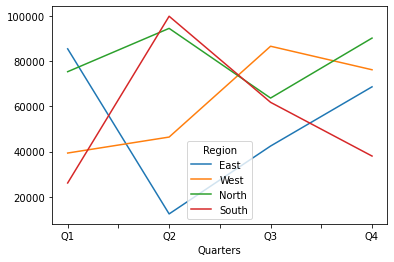

In [97]:
data.plot()  # Shortcut for data.plot.line()

## Plotly

In [98]:
# Set the plotting backend to Plotly
pd.options.plotting.backend = "plotly"

In [99]:
data.plot()

In [100]:
# Display the same data as bar plot
data.plot.bar(barmode="group")

# Data Import and Export
## Exporting to a CSV file

In [101]:
df.to_csv("course_participants.csv")

## Importing a CSV file

In [102]:
msft = pd.read_csv("csv/MSFT.csv")

"C:\path\to\desired\location\msft.csv".

In [103]:
msft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8622 entries, 0 to 8621
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8622 non-null   object 
 1   Open       8622 non-null   float64
 2   High       8622 non-null   float64
 3   Low        8622 non-null   float64
 4   Close      8622 non-null   float64
 5   Adj Close  8622 non-null   float64
 6   Volume     8622 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 471.6+ KB


In [104]:
# I am selecting a few columns because of space issues
# You can also just run: msft.head()
msft.loc[:, ["Date", "Adj Close", "Volume"]].head()

,Date,Adj Close,Volume
0,1986-03-13,0.062205,1031788800
1,1986-03-14,0.064427,308160000
2,1986-03-17,0.065537,133171200
3,1986-03-18,0.063871,67766400
4,1986-03-19,0.062760,47894400


In [105]:
msft.loc[:, ["Date", "Adj Close", "Volume"]].tail(2)

,Date,Adj Close,Volume
8620,2020-05-26,181.570007,36073600
8621,2020-05-27,181.809998,39492600


In [106]:
msft.loc[:, ["Adj Close", "Volume"]].describe()

,Adj Close,Volume
count,8622.000000,8.622000e+03
mean,24.921952,6.030722e+07
std,31.838096,3.877805e+07
min,0.057762,2.304000e+06
25%,2.247503,3.651632e+07
50%,18.454313,5.350380e+07
75%,25.699224,7.397560e+07
max,187.663330,1.031789e+09


In [107]:
# The line break in the URL is only to make it fit on the page
url = ("https://raw.githubusercontent.com/fzumstein/"
       "python-for-excel/1st-edition/csv/MSFT.csv")
msft = pd.read_csv(url)

In [108]:
msft.loc[:, ["Date", "Adj Close", "Volume"]].head(2)

,Date,Adj Close,Volume
0,1986-03-13,0.062205,1031788800
1,1986-03-14,0.064427,308160000
